In [1]:
import polars as pl

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

window_size = 20
a = 0.015

df = df.with_columns([
    ((pl.col('high') + pl.col('low') + pl.col('close')) / 3).alias('TP'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

df

open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,TP,return
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64
2023-11-22 00:00:00,0.00478,0.004825,0.004076,0.004531,1.2701e10,2023-11-22 23:59:59.999,5.6368e7,320715,6.1849e9,2.7467e7,"""1000BONKUSDT""",0.004477,null
2023-11-23 00:00:00,0.004531,0.004858,0.00393,0.004267,1.8971e10,2023-11-23 23:59:59.999,8.1590e7,573386,8.8982e9,3.8318e7,"""1000BONKUSDT""",0.004352,-0.058265
2023-11-24 00:00:00,0.004267,0.004335,0.003835,0.00414,1.7169e10,2023-11-24 23:59:59.999,6.9929e7,475254,7.9410e9,3.2393e7,"""1000BONKUSDT""",0.004103,-0.029763
2023-11-25 00:00:00,0.004143,0.0046,0.004084,0.00434,1.3093e10,2023-11-25 23:59:59.999,5.6988e7,501832,6.3891e9,2.7819e7,"""1000BONKUSDT""",0.004341,0.048309
2023-11-26 00:00:00,0.004341,0.004473,0.0039,0.004039,8.2273e9,2023-11-26 23:59:59.999,3.4347e7,344203,3.8247e9,1.5980e7,"""1000BONKUSDT""",0.004137,-0.069355
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-03-08 00:00:00,0.5161,0.5819,0.4875,0.5575,1.8804e8,2024-03-08 23:59:59.999,1.0033e8,686024,8.9756e7,4.7898e7,"""ZRXUSDT""",0.5423,0.080426
2024-03-09 00:00:00,0.5576,0.6067,0.5397,0.5785,9.4661e7,2024-03-09 23:59:59.999,5.3586e7,380425,4.6599725e7,2.6364e7,"""ZRXUSDT""",0.574967,0.037668
2024-03-10 00:00:00,0.5785,0.8259,0.5671,0.8005,7.80136805e8,2024-03-10 23:59:59.999,5.9270e8,2616066,3.9341e8,2.9910e8,"""ZRXUSDT""",0.731167,0.383751


In [2]:
# 计算TP的移动平均

df = df.with_columns([
    pl.col('TP').rolling_mean(window_size).over('symbol').alias('TP_MA')
])

df

open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,TP,return,TP_MA
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64,f64
2023-11-22 00:00:00,0.00478,0.004825,0.004076,0.004531,1.2701e10,2023-11-22 23:59:59.999,5.6368e7,320715,6.1849e9,2.7467e7,"""1000BONKUSDT""",0.004477,null,null
2023-11-23 00:00:00,0.004531,0.004858,0.00393,0.004267,1.8971e10,2023-11-23 23:59:59.999,8.1590e7,573386,8.8982e9,3.8318e7,"""1000BONKUSDT""",0.004352,-0.058265,null
2023-11-24 00:00:00,0.004267,0.004335,0.003835,0.00414,1.7169e10,2023-11-24 23:59:59.999,6.9929e7,475254,7.9410e9,3.2393e7,"""1000BONKUSDT""",0.004103,-0.029763,null
2023-11-25 00:00:00,0.004143,0.0046,0.004084,0.00434,1.3093e10,2023-11-25 23:59:59.999,5.6988e7,501832,6.3891e9,2.7819e7,"""1000BONKUSDT""",0.004341,0.048309,null
2023-11-26 00:00:00,0.004341,0.004473,0.0039,0.004039,8.2273e9,2023-11-26 23:59:59.999,3.4347e7,344203,3.8247e9,1.5980e7,"""1000BONKUSDT""",0.004137,-0.069355,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-03-08 00:00:00,0.5161,0.5819,0.4875,0.5575,1.8804e8,2024-03-08 23:59:59.999,1.0033e8,686024,8.9756e7,4.7898e7,"""ZRXUSDT""",0.5423,0.080426,0.39913
2024-03-09 00:00:00,0.5576,0.6067,0.5397,0.5785,9.4661e7,2024-03-09 23:59:59.999,5.3586e7,380425,4.6599725e7,2.6364e7,"""ZRXUSDT""",0.574967,0.037668,0.410328
2024-03-10 00:00:00,0.5785,0.8259,0.5671,0.8005,7.80136805e8,2024-03-10 23:59:59.999,5.9270e8,2616066,3.9341e8,2.9910e8,"""ZRXUSDT""",0.731167,0.383751,0.428778


In [3]:
# 定义计算 mean_dev 的函数
def calculate_mean_dev(tp):
    matp = tp.mean()  # 当前窗口的 MATP
    mean_dev = (tp - matp).abs().mean()
    return mean_dev

# 使用 rolling_apply 来计算 mean_dev
df = df.with_columns([
    pl.col("TP").rolling_apply(
        function=calculate_mean_dev,
        window_size=window_size,
        weights=None
    ).over("symbol").alias("mean_dev")
])

/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_10303/3730253047.py:9: DeprecationWarning: `rolling_apply` is deprecated. It has been renamed to `rolling_map`.
  pl.col("TP").rolling_apply(


In [4]:
# 计算 rolling_mean
df = df.with_columns([
    pl.col("TP").rolling_mean(window_size).over("symbol").alias("MATP")
])

# 计算 CCI 因子值
df = df.with_columns([
    ((pl.col("TP") - pl.col("MATP")) / (a * pl.col("mean_dev"))).alias("CCI")
])

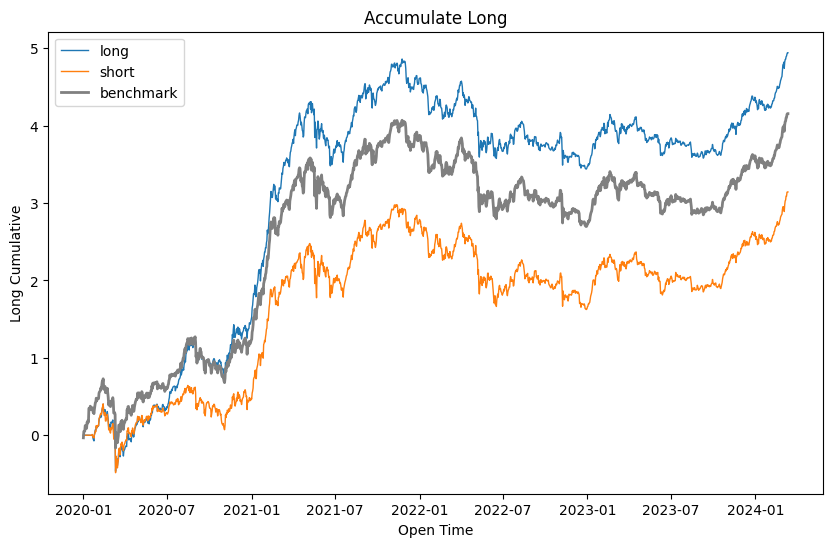

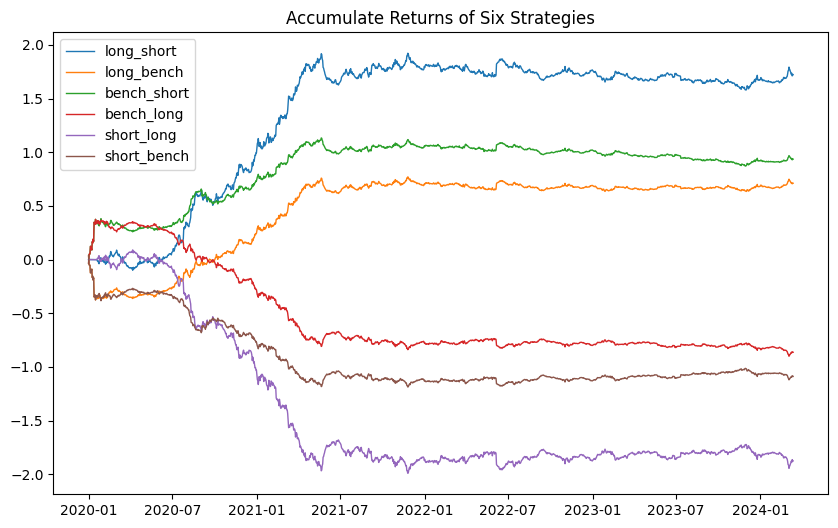

long: 
ann_return = 28.2438  sharpe = 6.1983  maxdd = 0.6196  calmar_ratio = 45.5809  

short: 
ann_return = 17.9628  sharpe = 3.9512  maxdd = 0.6335  calmar_ratio = 28.3531  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = 9.8429  sharpe = 7.0901  maxdd = 0.1722  calmar_ratio = 57.1558  

long_bench: 
ann_return = 4.0609  sharpe = 4.3215  maxdd = 0.3965  calmar_ratio = 10.2409  

bench_long: 
ann_return = -4.9369  sharpe = -5.2536  maxdd = 0.9278  calmar_ratio = -5.3214  

short_long: 
ann_return = -10.7189  sharpe = -7.7211  maxdd = 1.909  calmar_ratio = -5.6149  

short_bench: 
ann_return = -6.22  sharpe = -6.7036  maxdd = 1.1803  calmar_ratio = -5.2697  

bench_short: 
ann_return = 5.344  sharpe = 5.7595  maxdd = 0.1231  calmar_ratio = 43.4292  



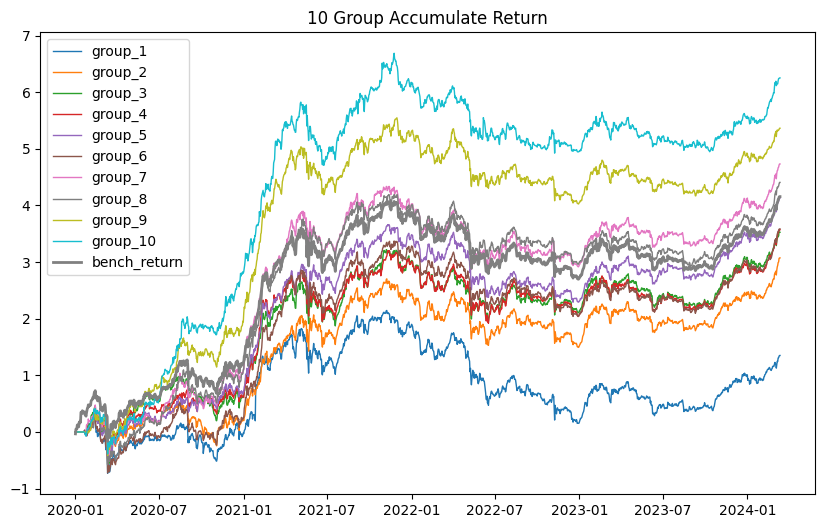

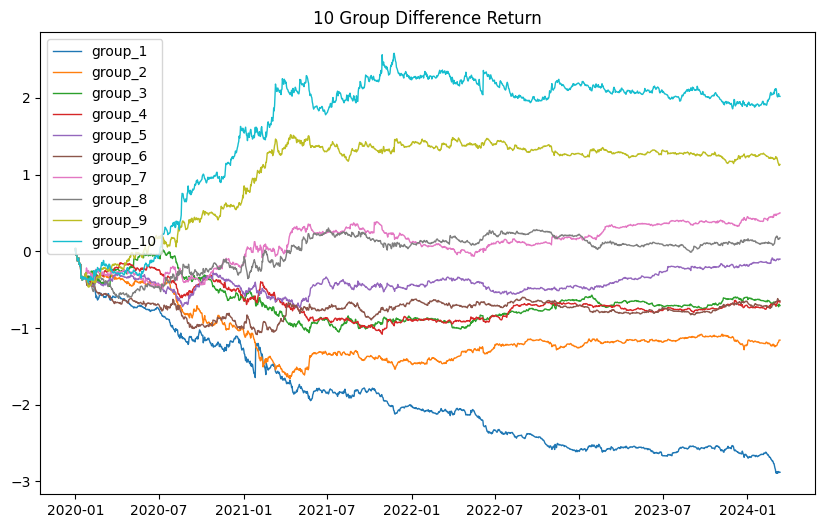

group_1: 
ann_return = 7.7147  sharpe = 1.5993  maxdd = 0.7795  calmar_ratio = 9.8964  

group_2: 
ann_return = 17.5603  sharpe = 3.7868  maxdd = 0.6167  calmar_ratio = 28.4768  

group_3: 
ann_return = 20.142  sharpe = 4.2433  maxdd = 0.7103  calmar_ratio = 28.3573  

group_4: 
ann_return = 20.402  sharpe = 4.3634  maxdd = 0.5752  calmar_ratio = 35.4708  

group_5: 
ann_return = 23.5994  sharpe = 5.093  maxdd = 0.6806  calmar_ratio = 34.6753  

group_6: 
ann_return = 20.486  sharpe = 4.3641  maxdd = 0.7797  calmar_ratio = 26.2726  

group_7: 
ann_return = 27.0382  sharpe = 5.6253  maxdd = 0.6203  calmar_ratio = 43.5884  

group_8: 
ann_return = 25.1761  sharpe = 5.2603  maxdd = 0.6824  calmar_ratio = 36.8949  

group_9: 
ann_return = 30.6436  sharpe = 6.3987  maxdd = 0.5581  calmar_ratio = 54.9095  

group_10: 
ann_return = 35.7201  sharpe = 6.9806  maxdd = 0.5668  calmar_ratio = 63.0229  

-----------------------------------------
group_difference_1: 
ann_return = -16.4681  sharpe = 

In [5]:
factors = df.select(['open_time', 'symbol', 'CCI'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()